In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from keras.layers import Input, Dense
from keras.models import Model
from keras import metrics 

%config InlineBackend.figure_format = 'retina'

In [4]:
from keras.datasets import boston_housing
(x_train,y_train),(x_test,y_test)=boston_housing.load_data()
cols = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT']

In [30]:
train_df = pd.DataFrame(data=x_train, columns=cols)
test_df = pd.DataFrame(data=x_test, columns=cols)

In [6]:
train_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,1.23247,0.0,8.14,0.0,0.538,6.142,91.7,3.9769,4.0,307.0,21.0,396.90,18.72
1,0.02177,82.5,2.03,0.0,0.415,7.610,15.7,6.2700,2.0,348.0,14.7,395.38,3.11
2,4.89822,0.0,18.10,0.0,0.631,4.970,100.0,1.3325,24.0,666.0,20.2,375.52,3.26
3,0.03961,0.0,5.19,0.0,0.515,6.037,34.5,5.9853,5.0,224.0,20.2,396.90,8.01
4,3.69311,0.0,18.10,0.0,0.713,6.376,88.4,2.5671,24.0,666.0,20.2,391.43,14.65


In [7]:
train_df.shape

(404, 13)

In [8]:
x_train_crim = train_df['CRIM'].values
x_test_crim = test_df['CRIM'].values

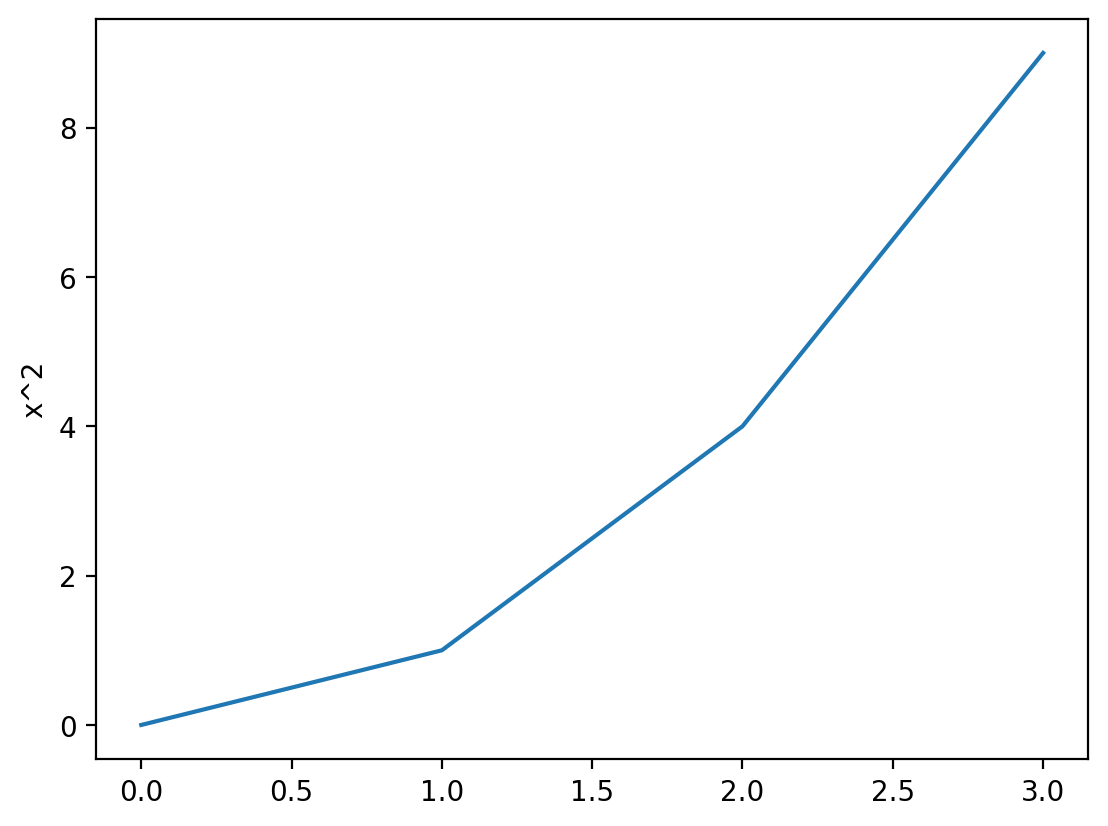

In [9]:
plt.plot([0, 1, 2, 3], [0, 1, 4, 9])
plt.ylabel('x^2')
plt.show()

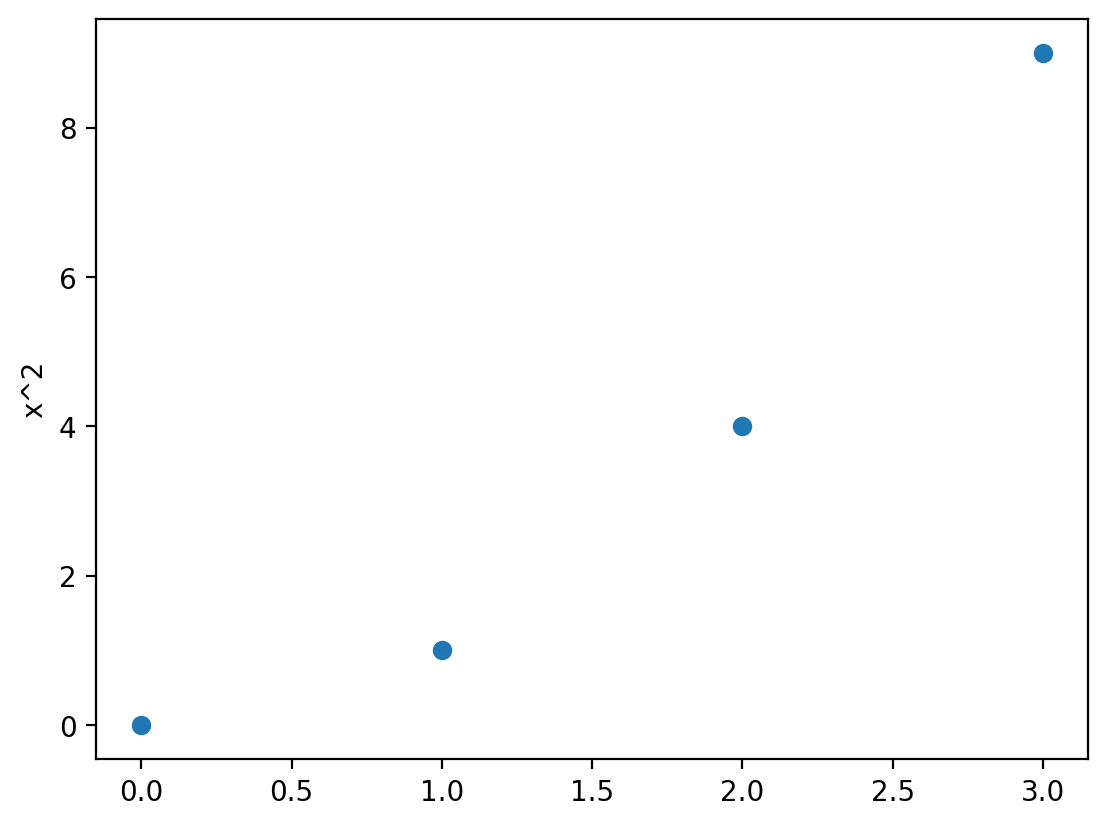

In [11]:
x =  np.array([0, 1, 2, 3])
y = x**2
plt.plot(x, y, 'o')
plt.ylabel('x^2')
plt.show()

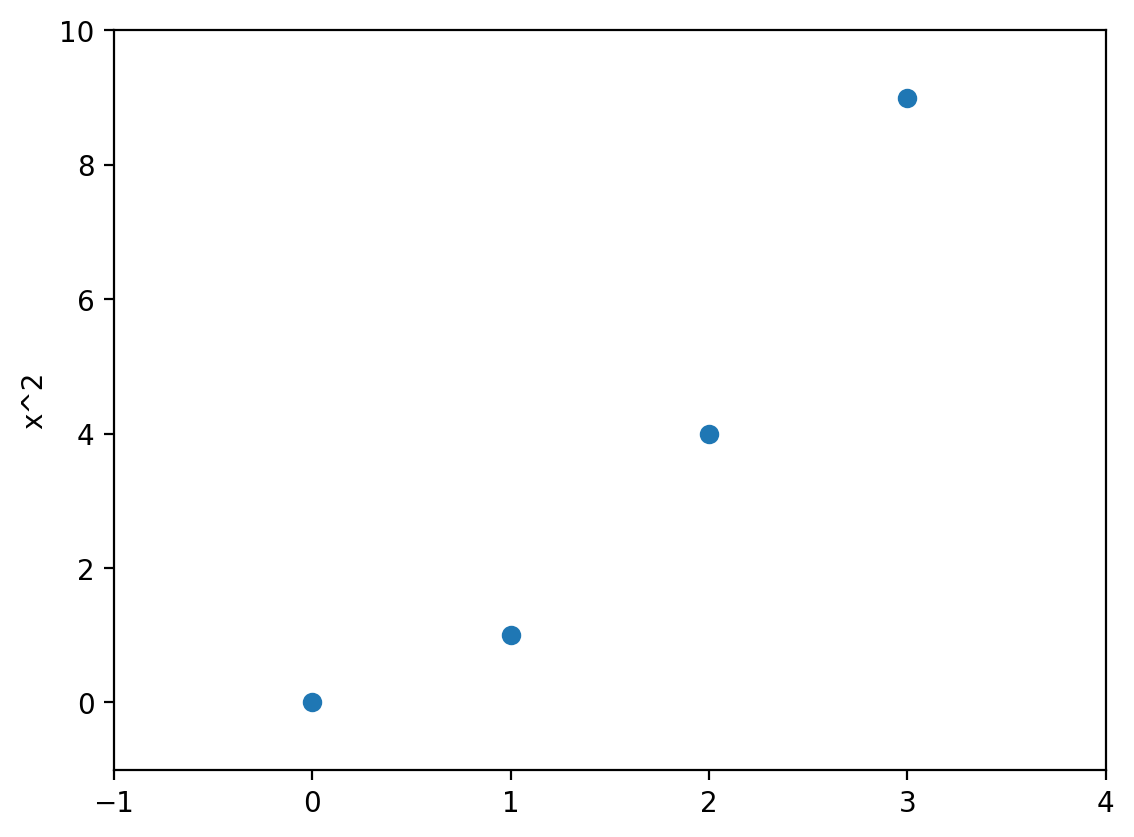

In [12]:
plt.plot([0, 1, 2, 3], [0, 1, 4, 9], 'o')
plt.ylabel('x^2')
plt.axis([-1,4,-1,10])
plt.show()

C:\Users\User\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


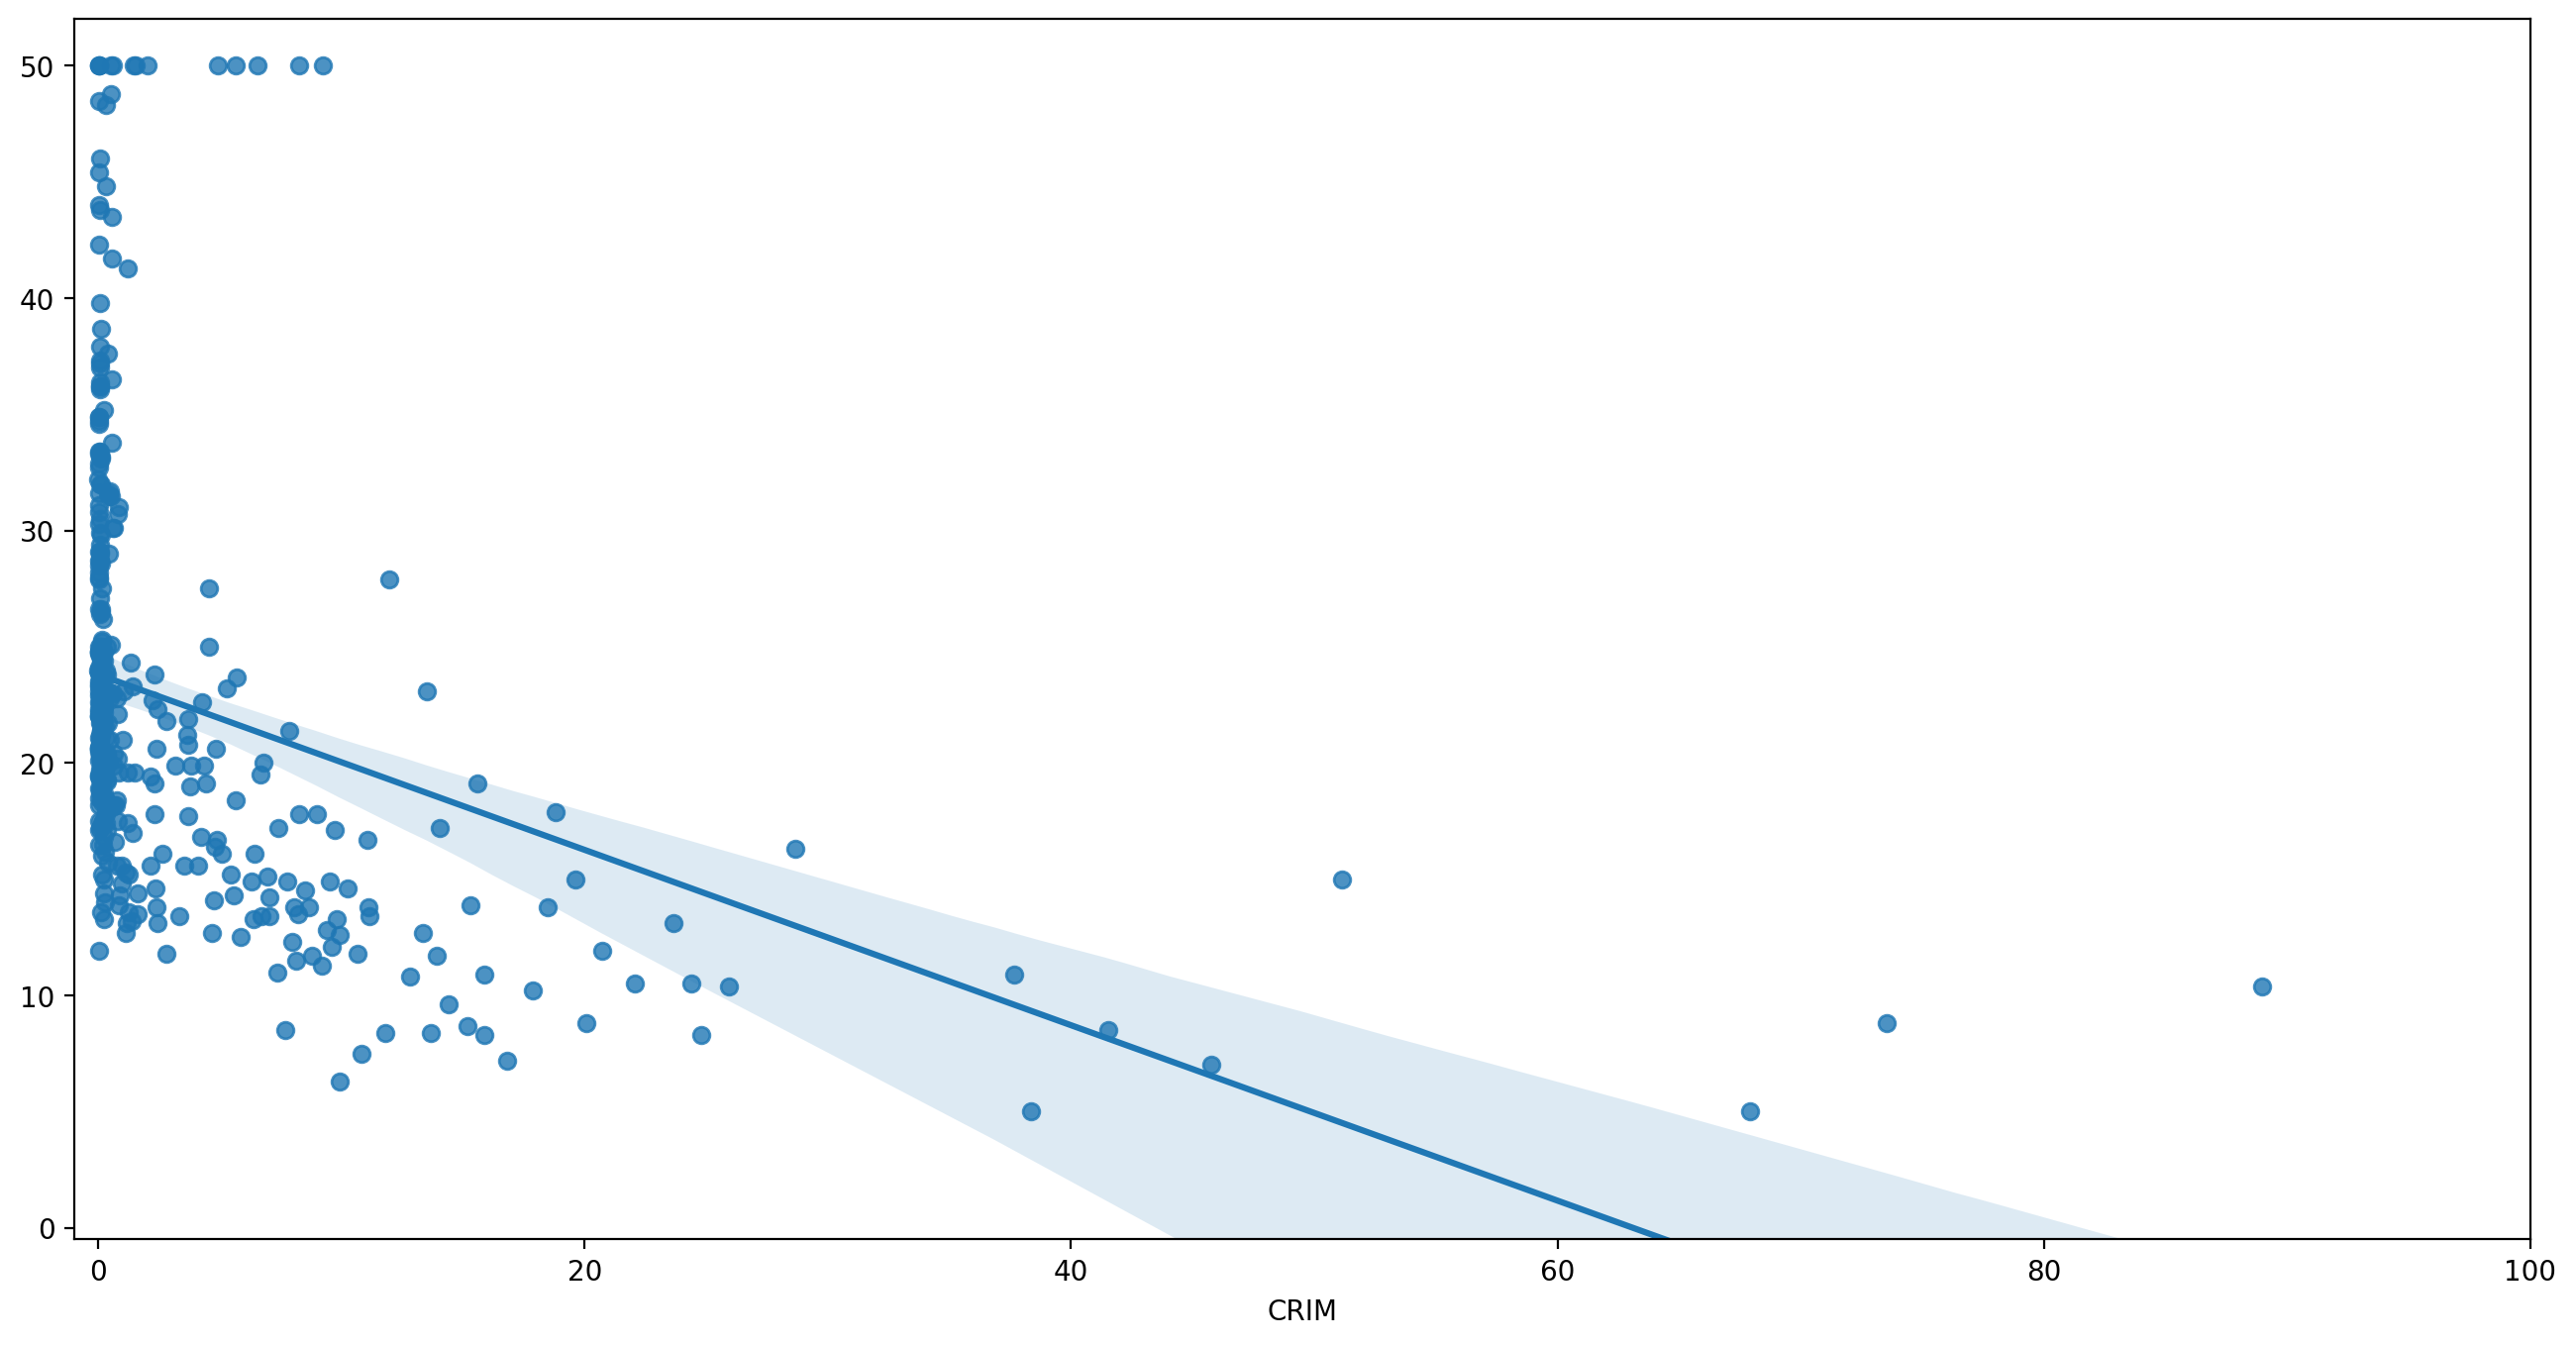

In [13]:
plt.figure(figsize=(16,8))
plt.axis([-1,100,-0.5,52])
sns.regplot(train_df['CRIM'], y_train)
plt.show()

In [15]:
inputs = Input(shape=(1,))
fc1 = Dense(10, activation='relu')(inputs)
fc2 = Dense(30, activation='relu')(fc1)
outputs = Dense(1)(fc2)

model = Model(inputs=inputs, outputs=outputs)

In [16]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 1)]               0         
                                                                 
 dense_1 (Dense)             (None, 10)                20        
                                                                 
 dense_2 (Dense)             (None, 30)                330       
                                                                 
 dense_3 (Dense)             (None, 1)                 31        
                                                                 
Total params: 381
Trainable params: 381
Non-trainable params: 0
_________________________________________________________________


In [18]:
model.compile(optimizer = 'RMSprop', loss = 'mean_squared_error')

In [19]:
history = model.fit(x_train_crim, y_train, epochs=30,
                   batch_size=8)

Epoch 1/30
51/51 [==============================] - 3s 5ms/step - loss: 553.9445
Epoch 2/30
51/51 [==============================] - 0s 4ms/step - loss: 543.6877
Epoch 3/30
51/51 [==============================] - 0s 4ms/step - loss: 532.8609
Epoch 4/30
51/51 [==============================] - 0s 4ms/step - loss: 522.9875
Epoch 5/30
51/51 [==============================] - 0s 4ms/step - loss: 510.0293
Epoch 6/30
51/51 [==============================] - 0s 4ms/step - loss: 496.7482
Epoch 7/30
51/51 [==============================] - 0s 4ms/step - loss: 481.7682
Epoch 8/30
51/51 [==============================] - 0s 4ms/step - loss: 468.8733
Epoch 9/30
51/51 [==============================] - 0s 4ms/step - loss: 449.1558
Epoch 10/30
51/51 [==============================] - 0s 4ms/step - loss: 431.5684
Epoch 11/30
51/51 [==============================] - 0s 4ms/step - loss: 413.7823
Epoch 12/30
51/51 [==============================] - 0s 4ms/step - loss: 392.9700
Epoch 13/30
51/51 [======

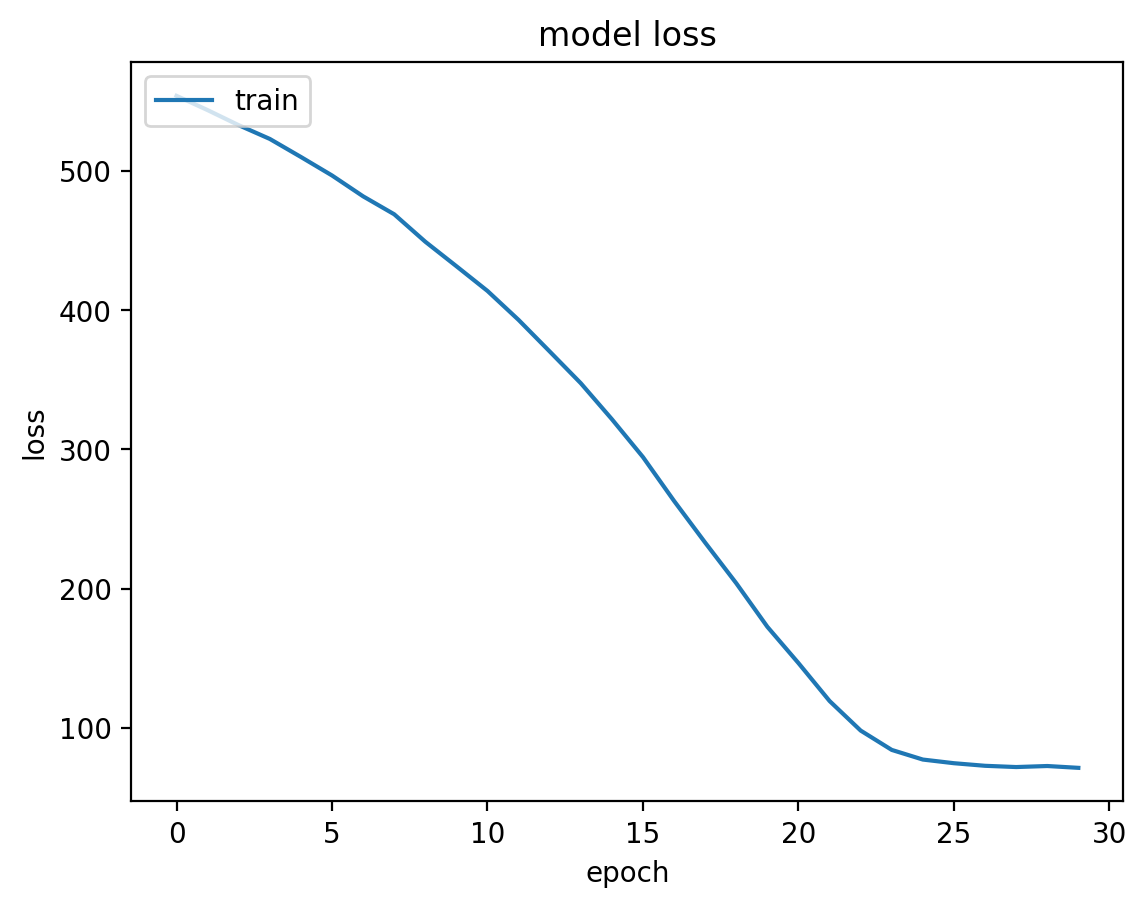

In [20]:
plt.plot(history.history['loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train'], loc='upper left')
plt.show()

In [21]:
def create_model(input_shape):
    inputs = Input(shape=(input_shape,))
    fc1 = Dense(10, activation='relu')(inputs)
    fc2 = Dense(30, activation='relu')(fc1)
    outputs = Dense(1)(fc2)
    model = Model(inputs=inputs, outputs=outputs)
    return model

In [22]:
model = create_model(1)
model.summary()
model.compile(optimizer = 'RMSprop',
             loss = 'mean_squared_error')

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 1)]               0         
                                                                 
 dense_4 (Dense)             (None, 10)                20        
                                                                 
 dense_5 (Dense)             (None, 30)                330       
                                                                 
 dense_6 (Dense)             (None, 1)                 31        
                                                                 
Total params: 381
Trainable params: 381
Non-trainable params: 0
_________________________________________________________________


In [23]:
history = model.fit(x_train_crim, y_train,
                   validation_data=(x_test_crim, y_test),
                   epochs=30, batch_size=8)

Epoch 1/30
51/51 [==============================] - 1s 8ms/step - loss: 583.8102 - val_loss: 578.6490
Epoch 2/30
51/51 [==============================] - 0s 5ms/step - loss: 540.7290 - val_loss: 549.1221
Epoch 3/30
51/51 [==============================] - 0s 5ms/step - loss: 526.9696 - val_loss: 530.4169
Epoch 4/30
51/51 [==============================] - 0s 5ms/step - loss: 514.7576 - val_loss: 515.1932
Epoch 5/30
51/51 [==============================] - 0s 5ms/step - loss: 499.9879 - val_loss: 500.8141
Epoch 6/30
51/51 [==============================] - 0s 5ms/step - loss: 486.8107 - val_loss: 484.8795
Epoch 7/30
51/51 [==============================] - 0s 5ms/step - loss: 468.8312 - val_loss: 468.2205
Epoch 8/30
51/51 [==============================] - 0s 5ms/step - loss: 456.9896 - val_loss: 450.3470
Epoch 9/30
51/51 [==============================] - 0s 5ms/step - loss: 436.5056 - val_loss: 433.5919
Epoch 10/30
51/51 [==============================] - 0s 5ms/step - loss: 417.2840 

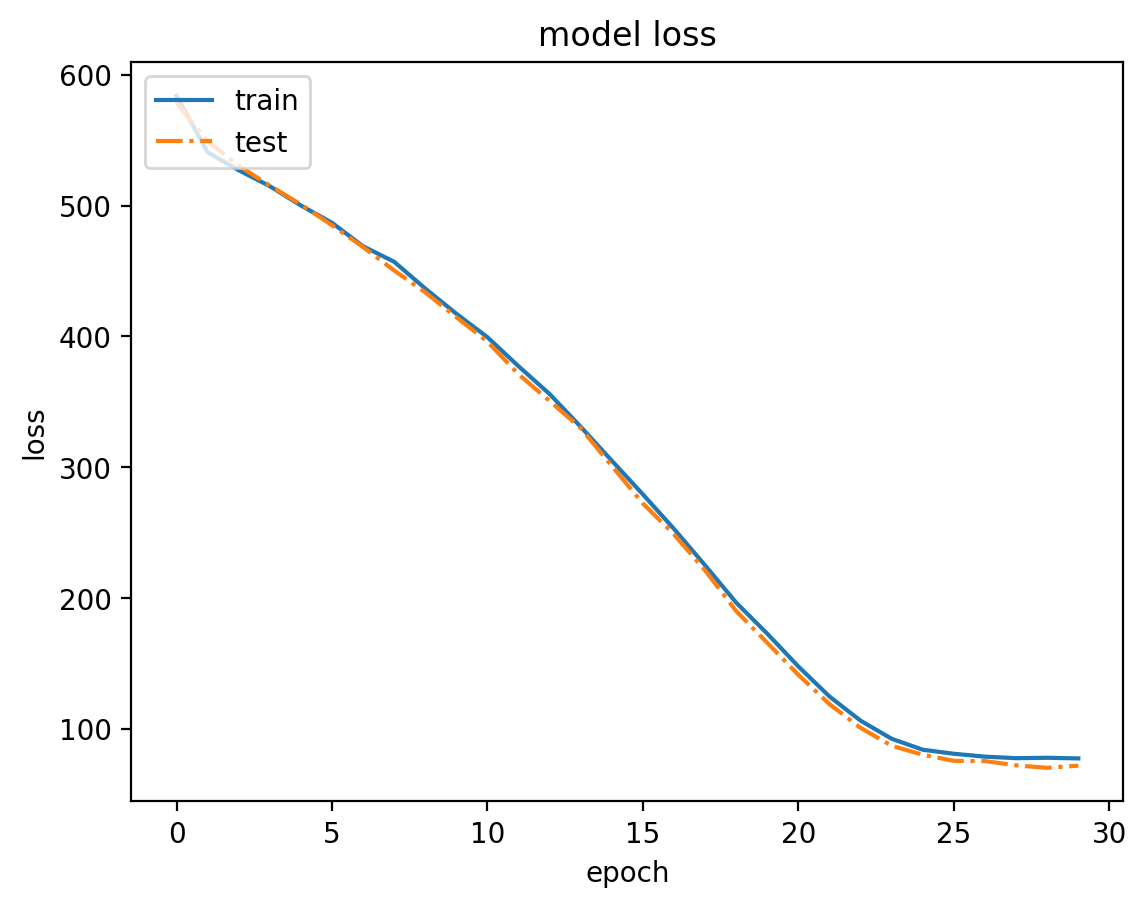

In [24]:
plt.plot(history.history['loss'], '-')
plt.plot(history.history['val_loss'] , '-.')
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

C:\Users\User\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


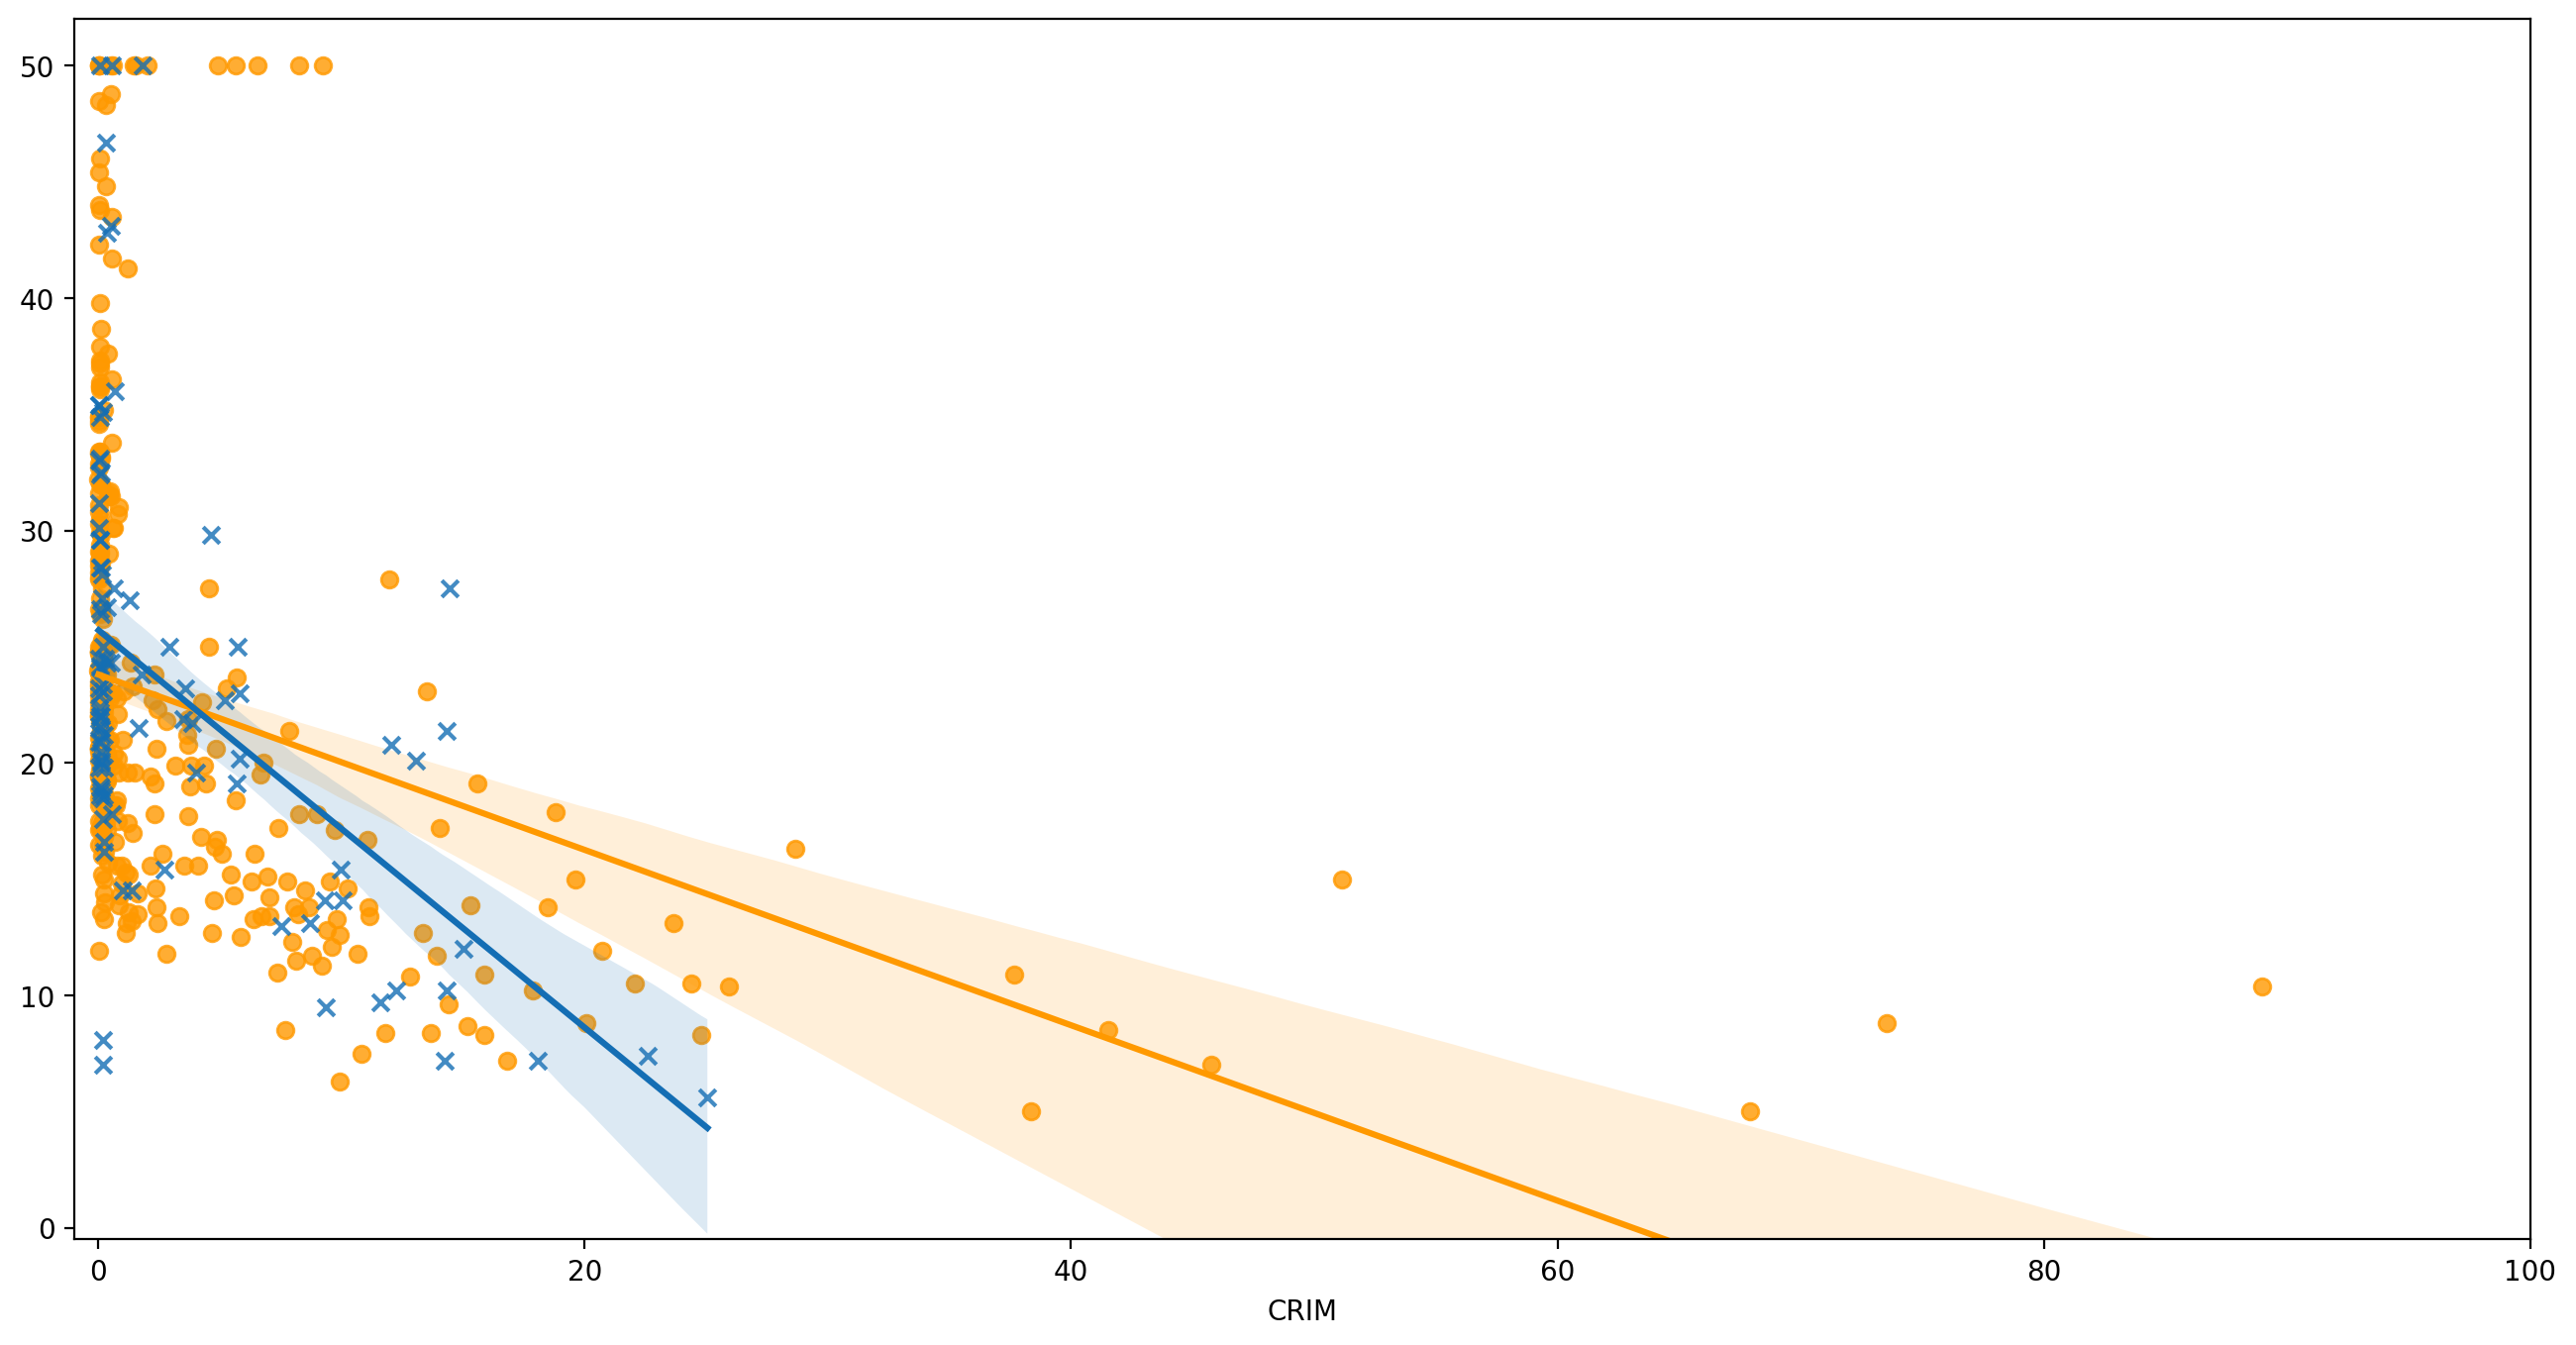

In [31]:
test_df = pd.DataFrame(data=x_test, columns=cols)

plt.figure(figsize=(16,8))
plt.axis([-1,100,-0.5,52])
sns.regplot(train_df['CRIM'], y_train, color='#ff9900', marker="o")
sns.regplot(test_df['CRIM'], y_test, color='#146EB4', marker="x")
plt.show()

C:\Users\User\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


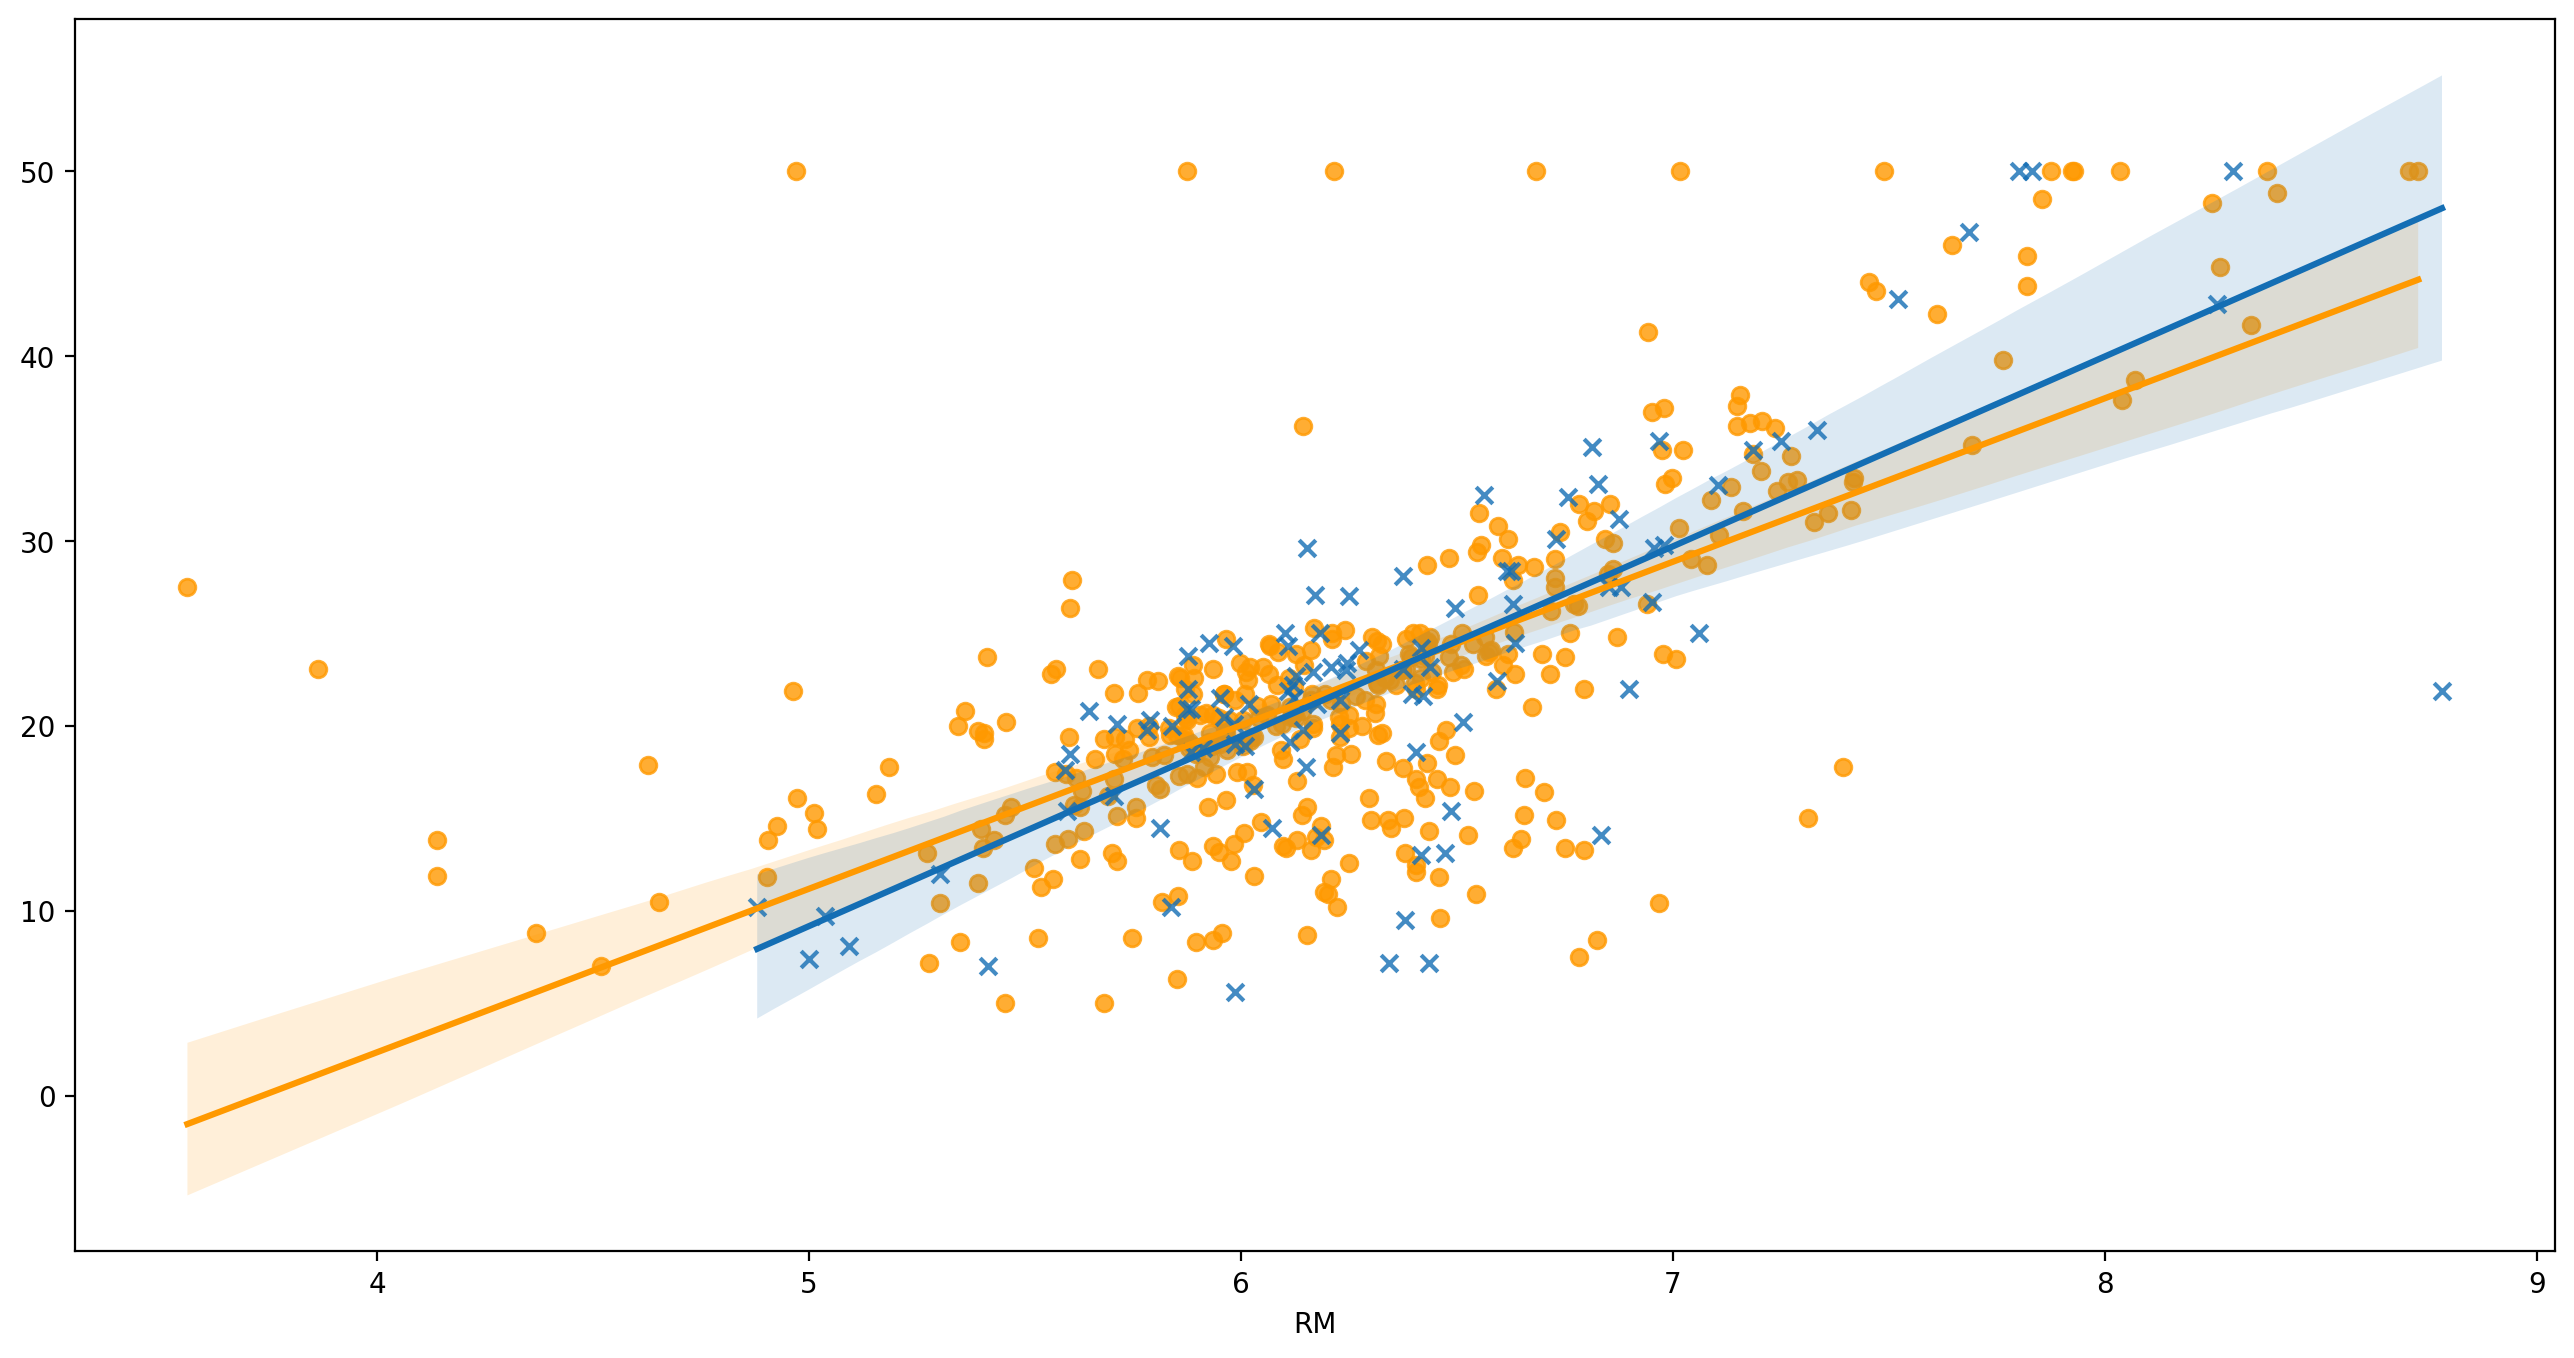

In [32]:
test_df = pd.DataFrame(data=x_test, columns=cols)

plt.figure(figsize=(16,8))
sns.regplot(train_df['RM'], y_train, color='#ff9900', marker="o")
sns.regplot(test_df['RM'], y_test, color='#146EB4', marker="x")
plt.show()

C:\Users\User\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


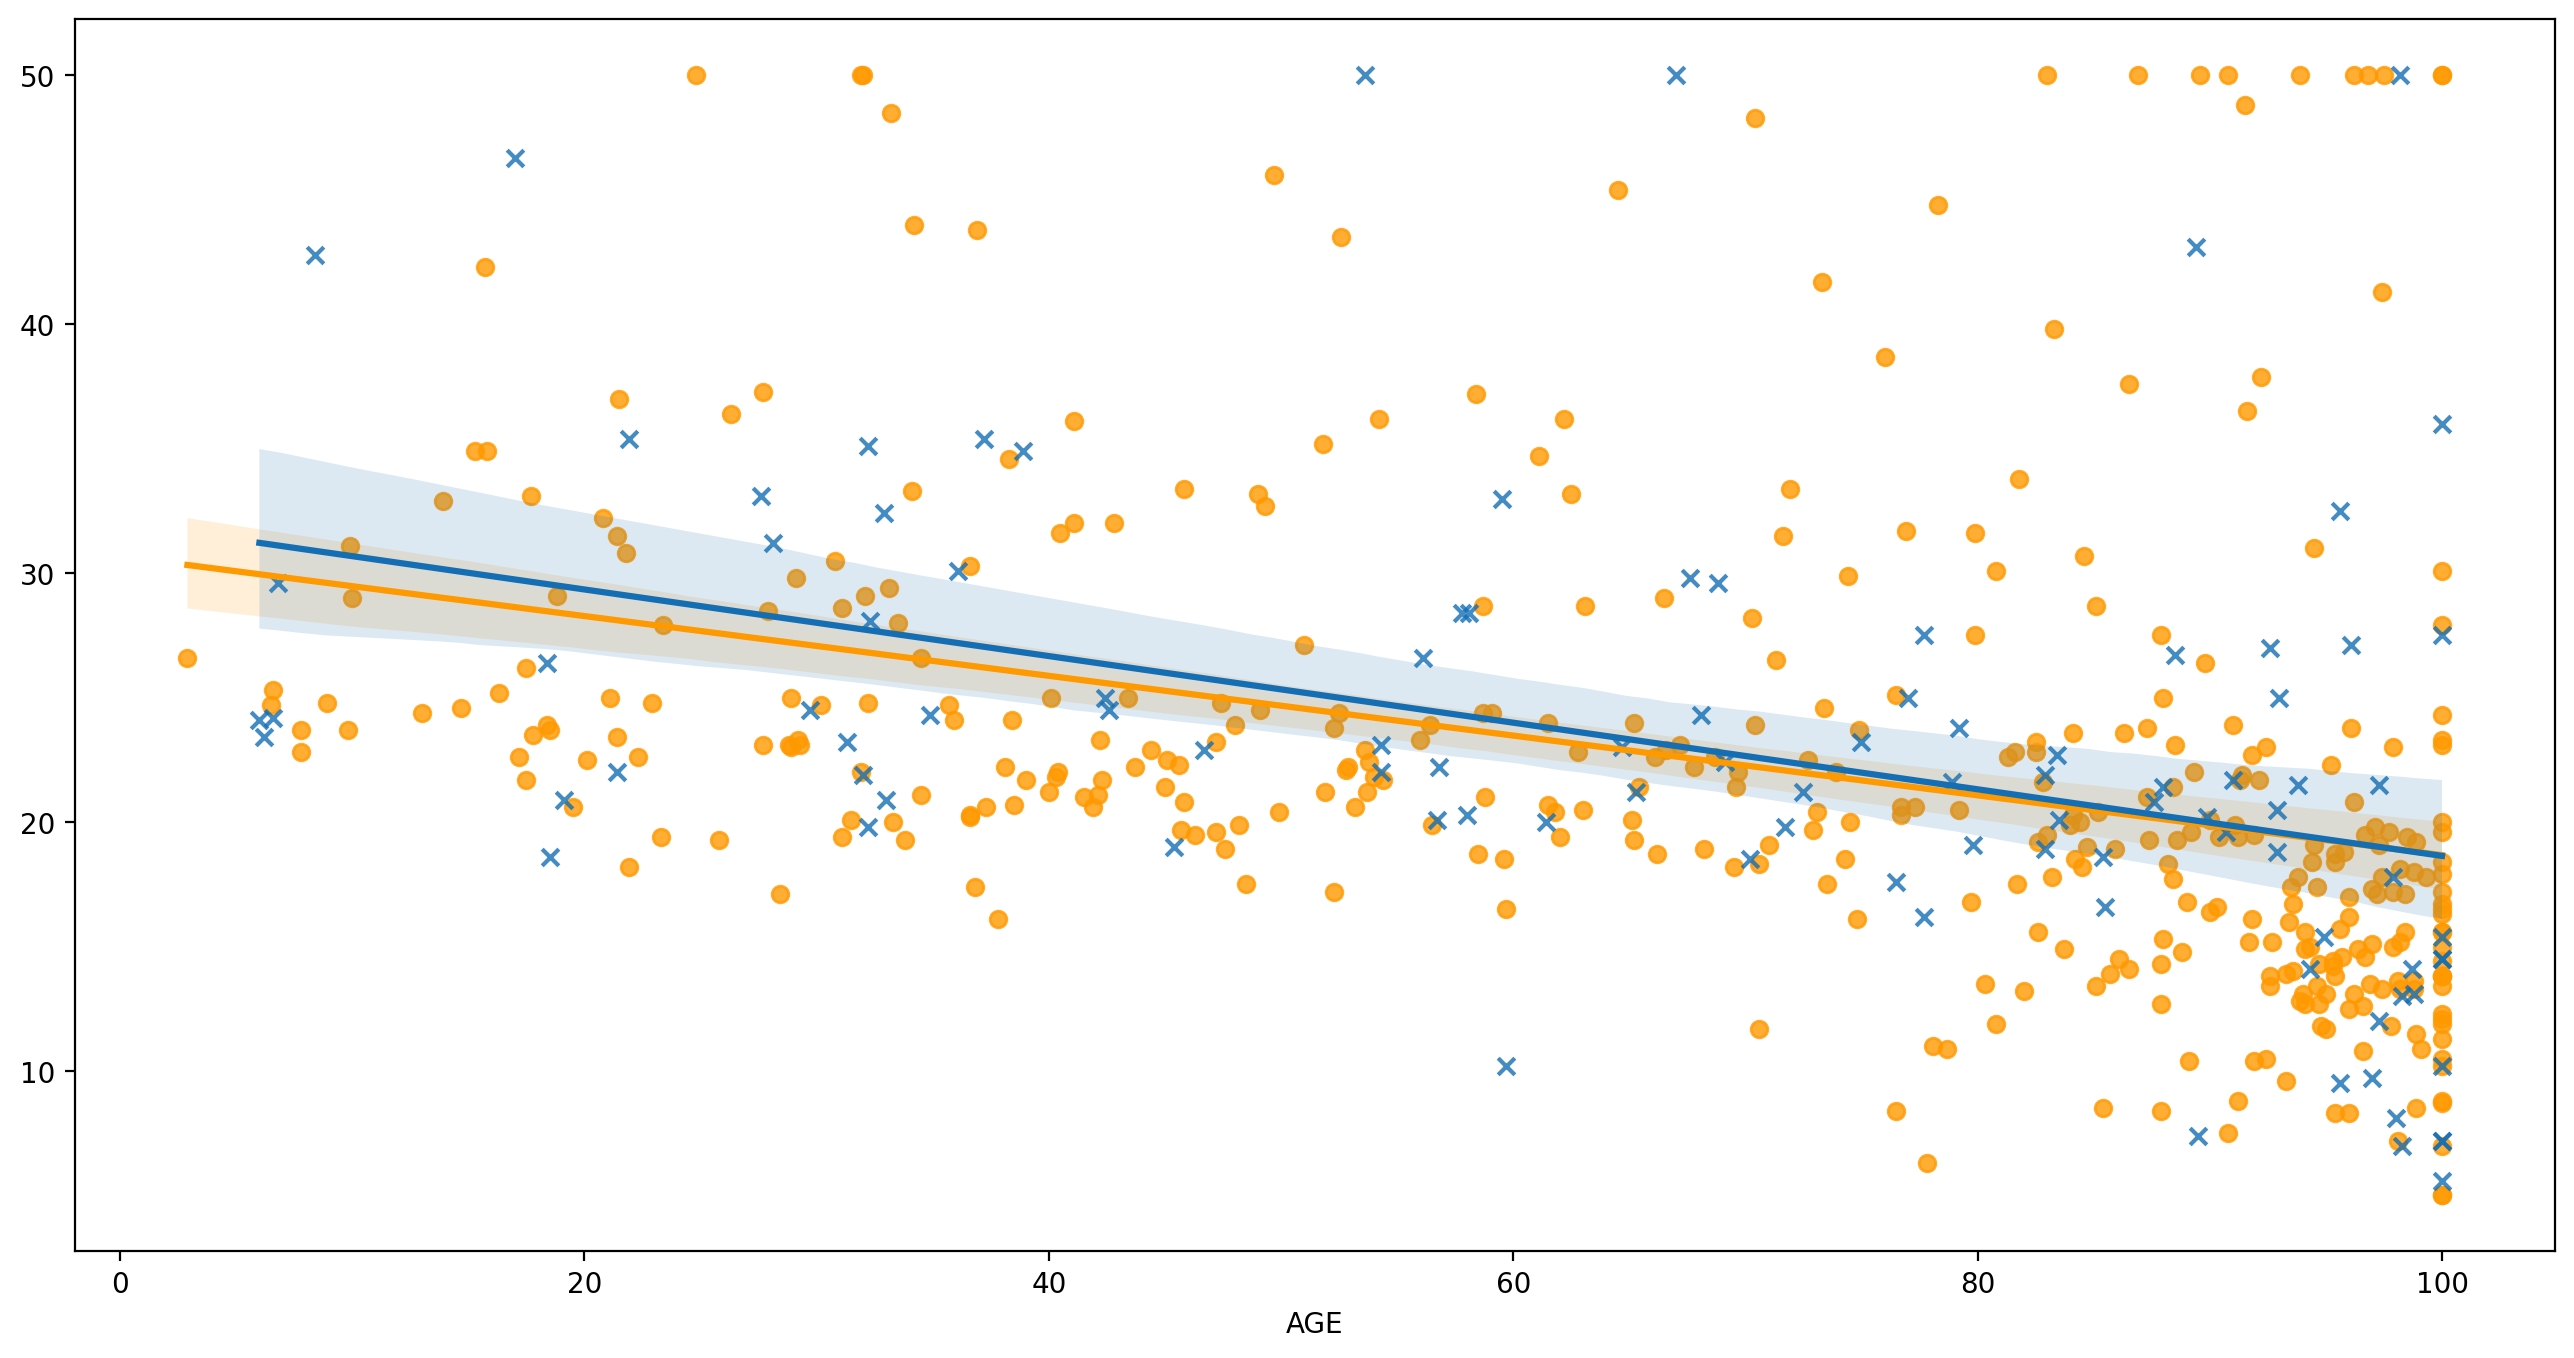

In [33]:
test_df = pd.DataFrame(data=x_test, columns=cols)

plt.figure(figsize=(16,8))
sns.regplot(train_df['AGE'], y_train, color='#ff9900', marker="o")
sns.regplot(test_df['AGE'], y_test, color='#146EB4', marker="x")
plt.show()

C:\Users\User\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


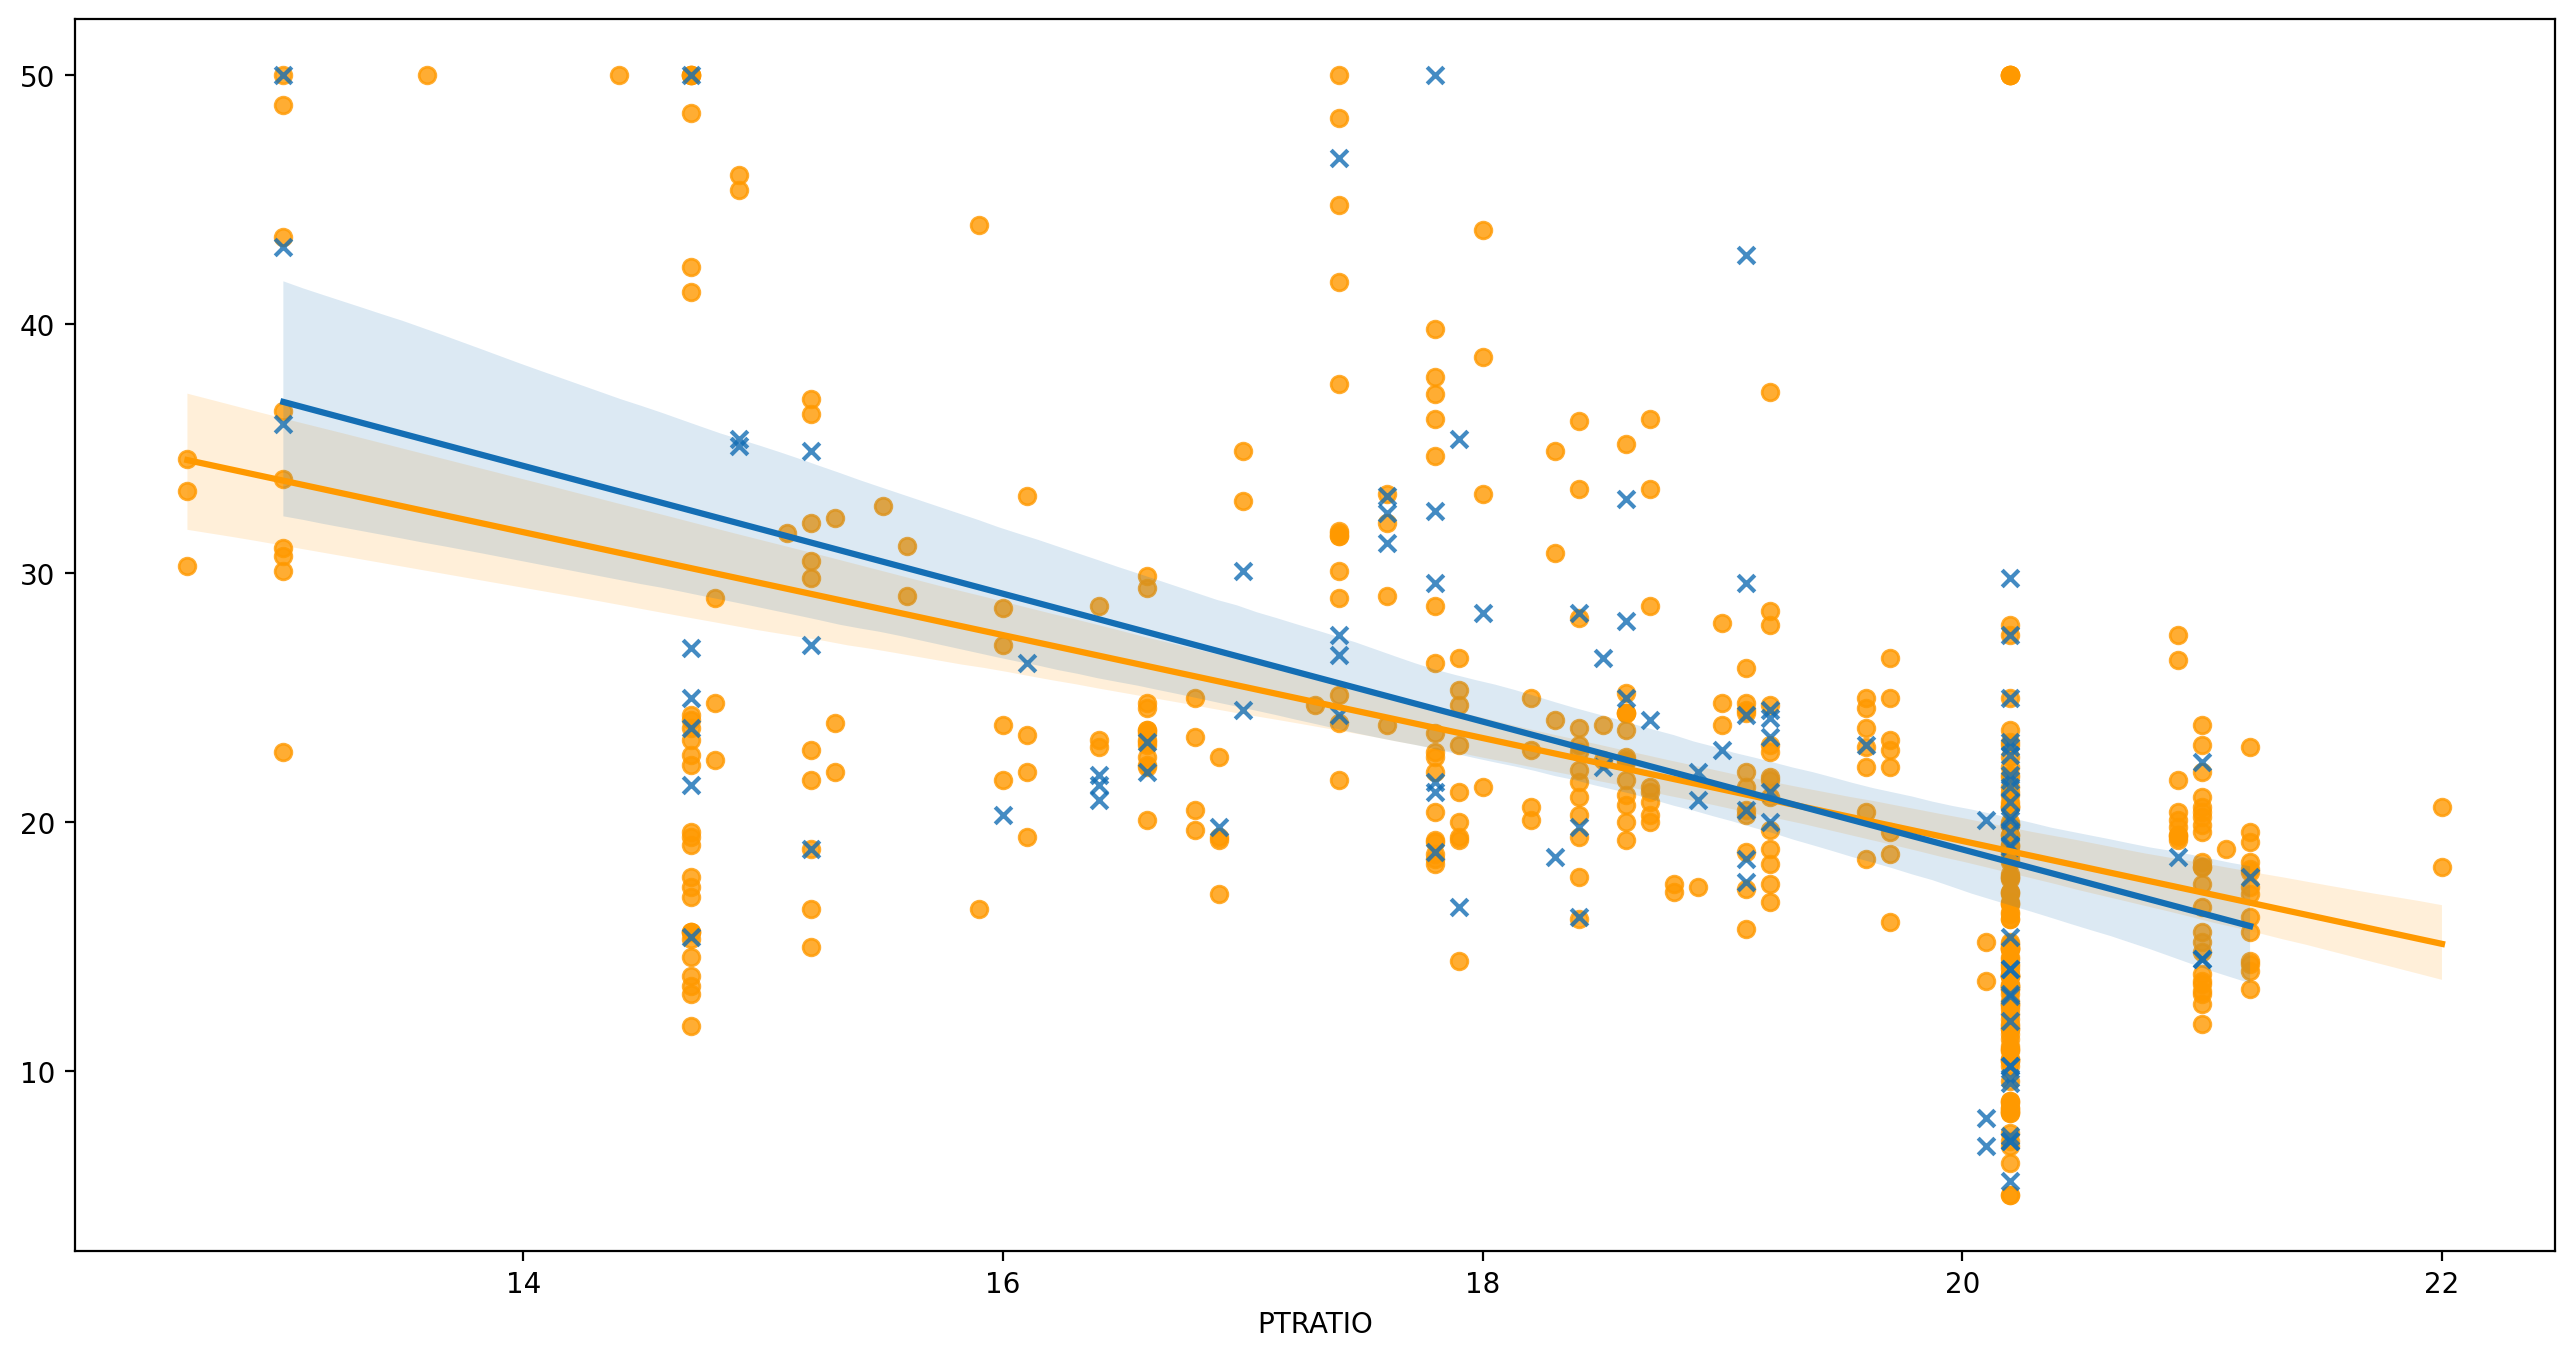

In [34]:
test_df = pd.DataFrame(data=x_test, columns=cols)

plt.figure(figsize=(16,8))
sns.regplot(train_df['PTRATIO'], y_train, color='#ff9900', marker="o")
sns.regplot(test_df['PTRATIO'], y_test, color='#146EB4', marker="x")
plt.show()

In [36]:
x_train_four = train_df[['CRIM', 'RM', 'AGE',
                        'PTRATIO']].values

In [37]:
x_test_four = test_df[['CRIM', 'RM', 'AGE',
                      'PTRATIO']].values

In [38]:
model = create_model(4)
model.summary()
model.compile(optimizer = 'RMSprop',
             loss = 'mean_squared_error')

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_4 (InputLayer)        [(None, 4)]               0         
                                                                 
 dense_7 (Dense)             (None, 10)                50        
                                                                 
 dense_8 (Dense)             (None, 30)                330       
                                                                 
 dense_9 (Dense)             (None, 1)                 31        
                                                                 
Total params: 411
Trainable params: 411
Non-trainable params: 0
_________________________________________________________________


In [39]:
history = model.fit(x_train_four, y_train,
                   validation_data=(x_test_four, y_test),
                   epochs=30, batch_size=8)

Epoch 1/30
51/51 [==============================] - 1s 8ms/step - loss: 391.2617 - val_loss: 250.0085
Epoch 2/30
51/51 [==============================] - 0s 4ms/step - loss: 207.9343 - val_loss: 216.1123
Epoch 3/30
51/51 [==============================] - 0s 4ms/step - loss: 179.8583 - val_loss: 188.0929
Epoch 4/30
51/51 [==============================] - 0s 5ms/step - loss: 159.5004 - val_loss: 166.9335
Epoch 5/30
51/51 [==============================] - 0s 5ms/step - loss: 140.7154 - val_loss: 146.4755
Epoch 6/30
51/51 [==============================] - 0s 4ms/step - loss: 125.1528 - val_loss: 134.5113
Epoch 7/30
51/51 [==============================] - 0s 4ms/step - loss: 114.8703 - val_loss: 118.2622
Epoch 8/30
51/51 [==============================] - 0s 4ms/step - loss: 107.0253 - val_loss: 108.0767
Epoch 9/30
51/51 [==============================] - 0s 4ms/step - loss: 101.6749 - val_loss: 105.9458
Epoch 10/30
51/51 [==============================] - 0s 4ms/step - loss: 97.9936 -

In [41]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from scipy import stats
from scipy.stats import norm

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

from keras.layers import Input, Dense, Dropout
from keras.models import Model
from keras import regularizers 
from keras import metrics


In [46]:
df_ks_cn = pd.read_csv("C:/Users/User/Downloads/dataset/house/경상남도_창녕군_개별주택가격정보_20190806.csv", encoding = "euc-kr")

In [48]:
df_dj_dg = pd.read_csv("C:/Users/User/Downloads/dataset/house/대전광역시_동구_개별주택가격정보_20190719.csv", encoding = "euc-kr")

In [49]:
df_jr_wj = pd.read_csv("C:/Users/User/Downloads/dataset/house/전라북도_완주군_개별주택가격정보_20191010.csv", encoding = "euc-kr")
df_jr_jj = pd.read_csv("C:/Users/User/Downloads/dataset/house/전라북도_전주시_개별주택가격정보_20190508.csv", encoding = "euc-kr")
df_cc_cj = pd.read_csv("C:/Users/User/Downloads/dataset/house/충청북도_충주시_개별주택가격정보_20190501.csv", encoding = "euc-kr")

In [54]:
df_tmp = []
df_tmp_y = []
for idx, df in enumerate([df_ks_cn, df_dj_dg, df_jr_wj, df_jr_jj,
                         df_cc_cj]):
    df_tmp.append(df.loc[:,['법정동코드', '법정동명', '지번', '특수지구분명', '토지대장면적', '산정대지면적', '건물전체연면적', '건물산정연면적', '표준지여부', '주택가격']])

df_train = pd.concat([df_tmp[0], df_tmp[1], df_tmp[2], df_tmp[3], 
                      df_tmp[4]])
df_train.head()

,법정동코드,법정동명,지번,특수지구분명,토지대장면적,산정대지면적,건물전체연면적,건물산정연면적,표준지여부,주택가격
0,4874025021,경상남도 창녕군 창녕읍 송현리,45-8,일반,610.0,610.0,93.15,93.15,N,97000000
1,4874025021,경상남도 창녕군 창녕읍 송현리,62-2,일반,270.0,270.0,51.57,51.57,N,51000000
2,4874025021,경상남도 창녕군 창녕읍 송현리,62-3,일반,476.0,376.0,81.58,81.58,N,88200000
3,4874025021,경상남도 창녕군 창녕읍 송현리,64-3,일반,415.0,415.0,135.85,135.85,N,110000000
4,4874025021,경상남도 창녕군 창녕읍 송현리,66-1,일반,533.0,47.0,28.76,28.76,N,6020000


In [55]:
df_train.columns = ['legal_code', 'legal_name', 'dist_num',
                   'is_special', 'land_area','counting_area',
                   'total_area', 'building_area',
                   'is_standard', 'price']
df_train.head()

,legal_code,legal_name,dist_num,is_special,land_area,counting_area,total_area,building_area,is_standard,price
0,4874025021,경상남도 창녕군 창녕읍 송현리,45-8,일반,610.0,610.0,93.15,93.15,N,97000000
1,4874025021,경상남도 창녕군 창녕읍 송현리,62-2,일반,270.0,270.0,51.57,51.57,N,51000000
2,4874025021,경상남도 창녕군 창녕읍 송현리,62-3,일반,476.0,376.0,81.58,81.58,N,88200000
3,4874025021,경상남도 창녕군 창녕읍 송현리,64-3,일반,415.0,415.0,135.85,135.85,N,110000000
4,4874025021,경상남도 창녕군 창녕읍 송현리,66-1,일반,533.0,47.0,28.76,28.76,N,6020000


In [56]:
df_train[df_train['price'] == 0]['price'].value_counts()

0    1258
Name: price, dtype: int64

In [57]:
df_train = df_train.loc[(df_train['price']!=0)]
print(df_train.shape)

(134799, 10)


In [28]:
pip list

Package                       Version
----------------------------- --------------------
absl-py                       1.3.0
alabaster                     0.7.12
anaconda-client               1.11.0
anaconda-navigator            2.3.1
anaconda-project              0.11.1
anyio                         3.5.0
appdirs                       1.4.4
argon2-cffi                   21.3.0
argon2-cffi-bindings          21.2.0
arrow                         1.2.2
astroid                       2.11.7
astropy                       5.1
astunparse                    1.6.3
atomicwrites                  1.4.0
attrs                         21.4.0
Automat                       20.2.0
autopep8                      1.6.0
Babel                         2.9.1
backcall                      0.2.0
backports.functools-lru-cache 1.6.4
backports.tempfile            1.0
backports.weakref             1.0.post1
bcrypt                        3.2.0
beautifulsoup4                4.11.1
binaryornot                   0.4.4
bi